## Observations and Insights 

Summary
1.	Statistically, the dataset is too small as each group (based on medicine) only has around 200 samples. If each group of population is only that much, then the standard deviation and standard error might be too large. In another word, the analysis based on this dataset might have test error.

2.	Due to finding out that the dataset contains duplicate data and the number of test times scientists using in each drug group is not the same, I recommend to my client that they have to control variables carefully in the future experiments because control accuracy can increase the data credibility.

3.	Based on this dataset, Capomulin is relatively the best anti-cancer pharmaceutical for squamous cell carcinoma (SCC). However, if our client is willing to do extra tests on the Ramicane group. Ramicane could be the best drug as its performance on curing cancer is better than Capomulin’s.

4. There are more details in my report.pdf


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset=pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')
# Display the data table for preview
dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_check=mouse_metadata['Mouse ID'].value_counts()

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dataset['Mouse ID'].value_counts()

g989    13
o331    10
q597    10
a411    10
c832    10
        ..
n482     1
o848     1
t573     1
u153     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_check=pd.DataFrame(dataset.loc[dataset['Mouse ID']=='g989'])
duplicate_check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=dataset.drop(dataset.index[dataset['Mouse ID']=='g989'],axis=0)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].value_counts()

s337    10
o287    10
j755    10
a492    10
a685    10
        ..
t573     1
f932     1
b447     1
l872     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
grouped=cleaned_df.groupby(cleaned_df['Drug Regimen'])
mean=round(grouped['Tumour Volume (mm3)'].mean(),2)
median=round(grouped['Tumour Volume (mm3)'].median(),2)
variance=round(grouped['Tumour Volume (mm3)'].var(),2)
STD=round(grouped['Tumour Volume (mm3)'].std(),2)
SEM=round(grouped['Tumour Volume (mm3)'].sem(),2)

Summary_Statistics=pd.DataFrame({'MEAN':mean,'MEDIAN':median,'VARIANCE':variance,
                                 'STD':STD,'SEM':SEM})

Summary_Statistics


,MEAN,MEDIAN,VARIANCE,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
new_grouped=cleaned_df.groupby(cleaned_df['Drug Regimen'])['Tumour Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
New_Summary_Statistics=new_grouped.agg([('MEAN','mean'),('MEDIAN','median'),
                                        ('VARIANCE','var'),('STD','std'),
                                        ('SEM','sem')])

New_Summary_Statistics

,MEAN,MEDIAN,VARIANCE,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


 # Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
TimeDrug=cleaned_df.groupby(cleaned_df['Drug Regimen'])['Timepoint'].count()
TimeDrug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

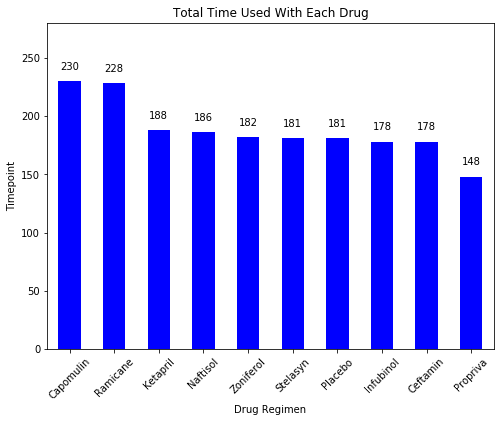

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
TimeDrug_bar=TimeDrug.sort_values(ascending=False).plot(kind='bar',facecolor='blue',width=0.5,
                                                        title='Total Time Used With Each Drug',
                                                        figsize=(8,6))


for x,y in enumerate(TimeDrug.sort_values(ascending=False)):
    plt.text(x,y+10,'%s'%y,ha='center')

TimeDrug_bar.set_ylabel("Timepoint")
TimeDrug_bar.set_xlim(-0.5,9.5)
TimeDrug_bar.set_ylim(0,max(TimeDrug)+50)
plt.xticks(rotation=45);




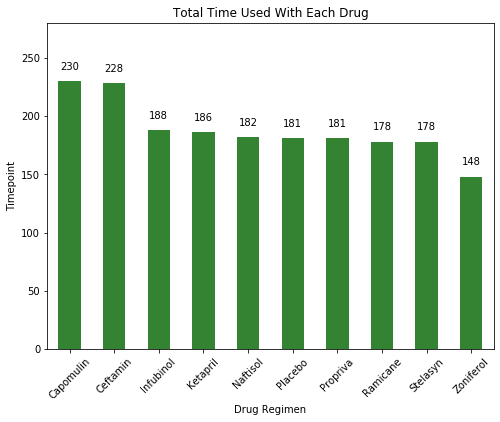

In [11]:
x_ticks=TimeDrug.index.values
x_axis=np.arange(len(x_ticks))
plt.figure(figsize=(8, 6))
plt.bar(x_axis,TimeDrug.sort_values(ascending=False),
        facecolor='darkgreen',alpha=0.8,
        align="center",width=0.5)


for x,y in enumerate(TimeDrug.sort_values(ascending=False)):
    plt.text(x,y+10,'%s'%y,ha='center')


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_ticks,rotation=45)
plt.title('Total Time Used With Each Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.xlim(-0.5,9.5)
plt.ylim(0,max(TimeDrug)+50);




In [12]:
sex=cleaned_df['Sex'].value_counts()
sex_df=sex.to_frame()
sex_df

,Sex
Male,958
Female,922


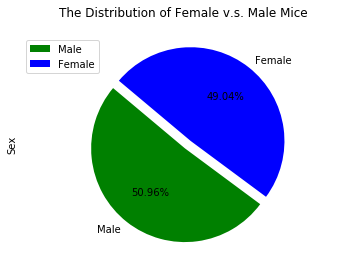

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
color=['green','blue']
sex_df.plot(kind='pie',autopct='%.2f%%',explode=(0.1,0),startangle=140,colors=color,
            title='The Distribution of Female v.s. Male Mice',subplots=True)
plt.axis("equal");


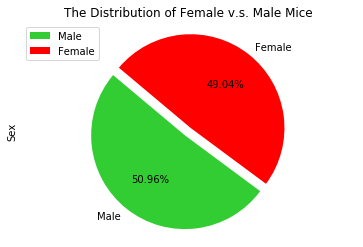

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=['Male','Female']
color=['limegreen','red']
plt.pie(sex_df['Sex'],labels=label,autopct='%.2f%%',explode=(0.1,0),startangle=140,colors=color)
plt.legend(label)
plt.ylabel("Sex")
plt.title('The Distribution of Female v.s. Male Mice')
plt.axis("equal");

# Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
finalmouse=cleaned_df.groupby(cleaned_df['Mouse ID'])['Timepoint'].max()
finalmouse

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [16]:
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
FindTumour=pd.merge(finalmouse,cleaned_df,on=['Mouse ID','Timepoint'],how='left')
FindTumour

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create four empty lists for plotting
T=[]            
# add subset 

for drug in treatments:
    T.append((FindTumour.loc[FindTumour["Drug Regimen"] == drug, ["Tumour Volume (mm3)"]]).squeeze())


pandas.core.series.Series

In [54]:
outliers=[]

for i in range(len(T)):
    iqr=T[i].quantile(0.75)-T[i].quantile(0.25)
    ub=T[i].quantile(0.75)+1.5*iqr
    lb=T[i].quantile(0.25)-1.5*iqr
    outliers.append(T[i][(T[i]<lb)|(T[i]>ub)])
    
outliers


[Series([], Name: Tumour Volume (mm3), dtype: float64),
 Series([], Name: Tumour Volume (mm3), dtype: float64),
 31    36.321346
 Name: Tumour Volume (mm3), dtype: float64,
 Series([], Name: Tumour Volume (mm3), dtype: float64)]

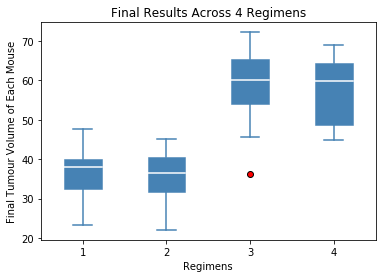

In [55]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
group=[T[i] for i in range(len(T))]
label=treatments
fig,ax1=plt.subplots()


#design
red_square = dict(markerfacecolor='r', marker='o')
ax1.boxplot(group,flierprops=red_square,patch_artist=True,
            medianprops={'color':'white','linewidth':1.5},
            meanprops={'color':'orange','linewidth':1.5},
            whiskerprops={'color':'steelblue','linewidth':1.5},
            boxprops={'facecolor':'steelblue','edgecolor':'steelblue','linewidth':0.5},
            capprops={'color':'steelblue','linewidth':1.5})
            
            

plt.title('Final Results Across 4 Regimens')
plt.xlabel('Regimens')
plt.ylabel('Final Tumour Volume of Each Mouse')

plt.show()

# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
Capomulin_chase=cleaned_df[(cleaned_df['Drug Regimen']=='Capomulin')&(cleaned_df['Mouse ID']=='s185')]
Capomulin_chase

In [ ]:
TumuorChange=Capomulin_chase['Tumour Volume (mm3)']
time=Capomulin_chase['Timepoint']
plt.plot(time,TumuorChange,color='darkred',linewidth=1.5)

plt.title('The Capomulin Result of Mouse s185 ')
plt.xlabel('Time Frame')
plt.ylabel('Tumour Volume (mm3)')
plt.ylim(0,max(TumuorChange)+15);

In [ ]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
Capomulin_chaseWeight=cleaned_df[(cleaned_df['Drug Regimen']=='Capomulin')].groupby(cleaned_df['Mouse ID']).mean()
Capomulin_chaseWeight

In [ ]:
AveWeight=Capomulin_chaseWeight['Weight (g)']
Tumour=Capomulin_chaseWeight['Tumour Volume (mm3)']
plt.scatter(AveWeight,Tumour,facecolor='orange',edgecolor='brown',alpha='0.8',linewidth='1.5')
plt.title('Average Tumour_Vol vs. Mouse Weight For The Capomulin Regimen ')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumour_Vol');

# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
correlation=st.pearsonr(AveWeight,Tumour)
correlation

In [ ]:
# for mouse weight and average tumour volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(AveWeight,Tumour)
regress_value=slope*AveWeight+intercept
line_eq ='y='+str(round(slope,2))+'x+'+str(round(intercept,2))


In [ ]:

plt.scatter(AveWeight,Tumour,facecolor='orange',edgecolor='brown',alpha='0.8',linewidth='1.5')
plt.plot(AveWeight,regress_value)
plt.annotate(line_eq,(20,36),fontsize=20)
plt.title('Average Tumour_Vol vs. Mouse Weight For The Capomulin Regimen ')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumour_Vol');
plt.show()